In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as ex
import seaborn as sns
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/crop-prediction-english-v2-master/crop_prediction_model_one.csv")

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [ ]:
df['label'].nunique()

22

In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
ex.scatter(df,x='humidity',y='ph',color='label',width=950,height=550)

<Axes: xlabel='temperature', ylabel='Density'>

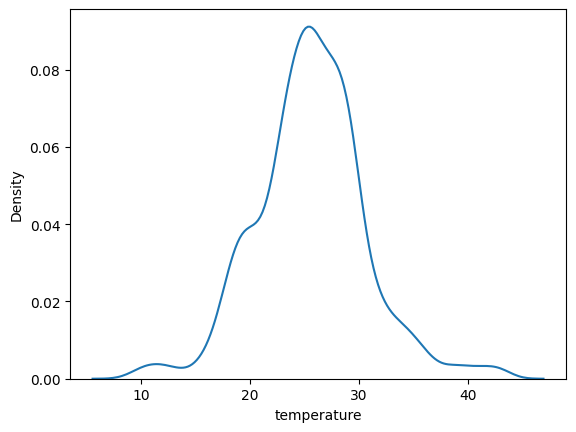

In [ ]:
sns.kdeplot(df['temperature'])

<Axes: ylabel='Frequency'>

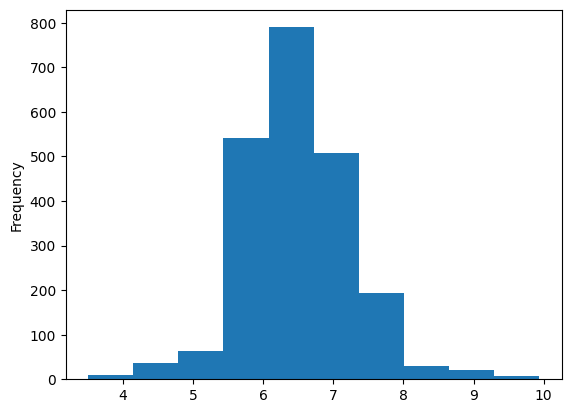

In [ ]:
df["ph"].plot.hist()

In [ ]:
new= df.drop('rainfall',axis=1)

In [ ]:
new.head()

,N,P,K,temperature,humidity,ph,label
0,90,42,43,20.879744,82.002744,6.502985,rice
1,85,58,41,21.770462,80.319644,7.038096,rice
2,60,55,44,23.004459,82.320763,7.840207,rice
3,74,35,40,26.491096,80.158363,6.980401,rice
4,78,42,42,20.130175,81.604873,7.628473,rice


# Train Test Split
Let's split up the data into a training set and a test set!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = new.drop('label',axis=1)
y = new['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
import pickle

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf=RandomForestClassifier()

In [ ]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
input_features=[90,42,43,21,82,7]
infprob=clf.predict([input_features])[0]
infprob

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



'rice'

In [ ]:
predictions=clf.predict(X_test)

In [ ]:
file=open('crop_Pred_RNDM_FOR.pkl','wb')
pickle.dump(clf,file)
file.close()

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        28
   blackgram       0.88      0.88      0.88        32
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        28
      cotton       1.00      1.00      1.00        29
      grapes       1.00      1.00      1.00        26
        jute       0.86      0.86      0.86        29
 kidneybeans       1.00      1.00      1.00        35
      lentil       0.84      0.89      0.86        35
       maize       1.00      1.00      1.00        33
       mango       1.00      1.00      1.00        36
   mothbeans       0.91      0.97      0.94        32
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        38
      orange       1.00      1.00      1.00        20
      papaya       1.00    

<Axes: >

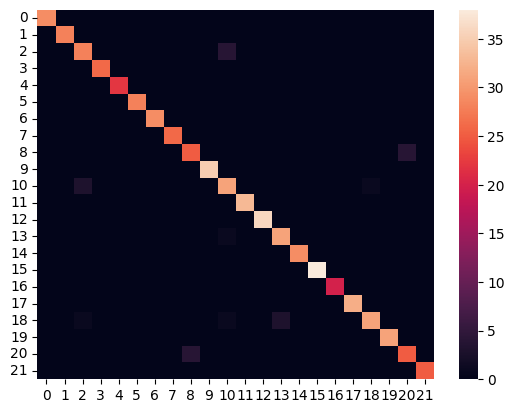

In [ ]:
y_predict=clf.predict(X_test)
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm)


In [ ]:
print("Total Accuracy RandomForest:",accuracy_score(y_test,y_predict))

Total Accuracy RandomForest: 0.9666666666666667
